# 1 . Import Dependencies

In [ ]:
# !pip install tensorflow==2.9.0

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
tf.__version__

'2.9.0'

# 2 . Import Helper Functions

In [3]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-27 15:28:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-27 15:28:47 (71.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [101]:
# Import calculate_results helper function
from helper_functions import calculate_results,create_tensorboard_callback

# 3 . Data Loading

In [5]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 1s 0us/step


In [53]:
df = pd.read_csv(csv_path,
                #  parse_dates=["Date Time"],
                #  index_col=["Date Time"]
                 )

In [7]:
# date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [46]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [54]:
df.shape

(420551, 15)

In [55]:
# Slice [start:stop:step], starting from index 5 take every 6th record
df1 = df[5::6]

In [56]:
# Getting the date_time as datetime series
date_time = pd.to_datetime(df1.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
print(type(date_time))

<class 'pandas.core.series.Series'>


In [57]:
df1.index = date_time

In [58]:
df1.shape

(70091, 14)

In [59]:
df1.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


# 4 . Creating Train and Test Sets

## Get X and y

In [60]:
# Get X and y
timesteps = df1.index.to_numpy()
temp = df1["T (degC)"].to_numpy()

timesteps[:10], temp[:10]

(array(['2009-01-01T01:00:00.000000000', '2009-01-01T02:00:00.000000000',
        '2009-01-01T03:00:00.000000000', '2009-01-01T04:00:00.000000000',
        '2009-01-01T05:00:00.000000000', '2009-01-01T06:00:00.000000000',
        '2009-01-01T07:00:00.000000000', '2009-01-01T08:00:00.000000000',
        '2009-01-01T09:00:00.000000000', '2009-01-01T10:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([-8.05, -8.88, -8.81, -9.05, -9.63, -9.67, -9.17, -8.1 , -7.66,
        -7.04]))

## Create Train and Test sets

In [61]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(temp)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], temp[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], temp[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(56072, 14019, 56072, 14019)

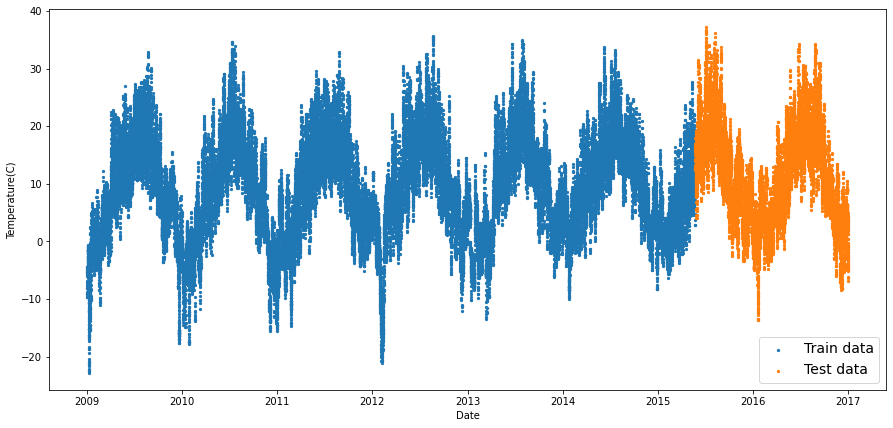

In [62]:
# Plot correctly made splits
plt.figure(figsize=(15, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Temperature(C)")
plt.legend(fontsize=14)
plt.show();

## Create Plotting Function

In [63]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

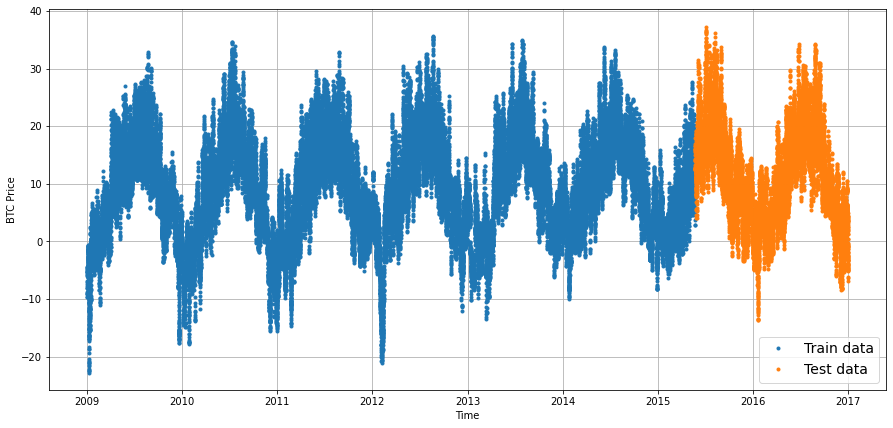

In [64]:
# Try out our plotting function
plt.figure(figsize=(15, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# 5 . Window the Data

In [65]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [66]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [67]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [68]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [69]:
full_windows, full_labels = make_windows(temp, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(70084, 70084)

In [71]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [-8.05 -8.88 -8.81 -9.05 -9.63 -9.67 -9.17] -> Label: [-8.1]
Window: [-8.88 -8.81 -9.05 -9.63 -9.67 -9.17 -8.1 ] -> Label: [-7.66]
Window: [-8.81 -9.05 -9.63 -9.67 -9.17 -8.1  -7.66] -> Label: [-7.04]


In [72]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [ 4.15  4.97  2.44  1.29 -0.42 -0.98 -1.4 ] -> Label: [-2.75]
Window: [ 4.97  2.44  1.29 -0.42 -0.98 -1.4  -2.75] -> Label: [-2.89]
Window: [ 2.44  1.29 -0.42 -0.98 -1.4  -2.75 -2.89] -> Label: [-3.93]


# 6 . Split for Train & Test (Windowed)

In [73]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [74]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(56067, 14017, 56067, 14017)

In [75]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

# Model 0: Dense model (window = 7, horizon = 1)

## Checkpoints

In [83]:
# Create Early Stopping Callbackss
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_mae', 
                                                          #  min_delta=0.05,
                                                           patience=3, restore_best_weights=True)

In [92]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_mae",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

In [93]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

#1. Construct model
model_0 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")# linear activation is the same as having no activation               
], name="model_0_dense") # name our model so we can save it

#2.Compile the model
model_0.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

#3. Fit the model
history_0 = model_0.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks = [early_stopping_callback,
                                     create_model_checkpoint(model_name=model_0.name), # because it slows down
                                    #  create_tensorboard_callback(dir_name='Time_Series_Question1', experiment_name='model_0')
                                     ]
            )

Epoch 1/100
439/439 [==============================] - 4s 6ms/step - loss: 0.9301 - mae: 0.9301 - mse: 2.5607 - val_loss: 0.7958 - val_mae: 0.7958 - val_mse: 1.1477
Epoch 2/100
439/439 [==============================] - 2s 4ms/step - loss: 0.5762 - mae: 0.5762 - mse: 0.7199 - val_loss: 0.5554 - val_mae: 0.5554 - val_mse: 0.6500
Epoch 3/100
439/439 [==============================] - 2s 4ms/step - loss: 0.5502 - mae: 0.5502 - mse: 0.6647 - val_loss: 0.6563 - val_mae: 0.6563 - val_mse: 0.8165
Epoch 4/100
439/439 [==============================] - 2s 4ms/step - loss: 0.5467 - mae: 0.5467 - mse: 0.6561 - val_loss: 0.7724 - val_mae: 0.7724 - val_mse: 1.0519
Epoch 5/100
439/439 [==============================] - 2s 4ms/step - loss: 0.5467 - mae: 0.5467 - mse: 0.6550 - val_loss: 0.5921 - val_mae: 0.5921 - val_mse: 0.7065


## Evaluate

In [94]:
# Evaluate model on test data
model_0.evaluate(test_windows, test_labels)

439/439 [==============================] - 1s 2ms/step - loss: 0.5554 - mae: 0.5554 - mse: 0.6500


[0.5553848743438721, 0.5553848743438721, 0.6500079035758972]

In [97]:
# Load in saved best performing model_1 and evaluate it on test data
model_0 = tf.keras.models.load_model("model_experiments/model_0_dense/")
model_0.evaluate(test_windows, test_labels)

439/439 [==============================] - 4s 8ms/step - loss: 0.5554 - mae: 0.5554 - mse: 0.6500


[0.5553848743438721, 0.5553848743438721, 0.6500079035758972]

## Making Forecast

In [98]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [99]:
# Make predictions using model_1 on the test dataset and view results
model_0_preds = make_preds(model_0, test_windows) 
len(model_0_preds), model_0_preds[:10]

439/439 [==============================] - 2s 4ms/step


(14017, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([16.410913, 14.996327, 14.497541, 13.735238, 12.860257, 12.499357,
        12.560735, 12.534502, 13.139522, 12.585578], dtype=float32)>)

## Some more Helper Functions

In [104]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [105]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [106]:
# Evaluate preds
model_0_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_0_preds)
model_0_results

{'mae': 0.5553849,
 'mse': 0.6500076,
 'rmse': 0.8062305,
 'mape': 102390.78,
 'mase': 0.7741226}

# Model 1 : Convo 1D

## Window Data

In [107]:
# Set Global Variables
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [108]:
# Create windowed data
full_windows, full_labels = make_windows(temp, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(70084, 70084)

In [109]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(56067, 56067, 14017, 14017)

In [111]:
# add an extra dimension for `input_dim`
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) 

In [113]:
# Test out our lambda layer
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[-8.05]
 [-8.88]
 [-8.81]
 [-9.05]
 [-9.63]
 [-9.67]
 [-9.17]]


## Checkpoints

In [115]:
# Create Early Stopping Callbackss
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                          #  min_delta=0.05,
                                                           patience=3, restore_best_weights=True)

In [116]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

In [117]:
# Creating the Model

tf.random.set_seed(42)

# Create Conv1D model
model_1 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)                      
], name="model_1_conv1D")

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

# Fit
history_1 = model_1.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[early_stopping_callback,
                       create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
431/439 [============================>.] - ETA: 0s - loss: 1.0361

439/439 [==============================] - 4s 7ms/step - loss: 1.0292 - val_loss: 0.5864
Epoch 2/100
439/439 [==============================] - 2s 5ms/step - loss: 0.5794 - val_loss: 0.6732
Epoch 3/100
439/439 [==============================] - 2s 4ms/step - loss: 0.5564 - val_loss: 0.7334
Epoch 4/100
439/439 [==============================] - 1s 3ms/step - loss: 0.5511 - val_loss: 0.8003


## Evaluate

In [118]:
model_1.evaluate(test_windows,test_labels)

439/439 [==============================] - 1s 2ms/step - loss: 0.5864


0.586378812789917

In [119]:
# Load back in best performing Conv1D and re-evaluate
model_1 = tf.keras.models.load_model("model_experiments/model_1_conv1D")
model_1.evaluate(test_windows, test_labels)

439/439 [==============================] - 1s 2ms/step - loss: 0.5864


0.586378812789917

## Making Forecast

In [120]:
# Make predictions
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

439/439 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.225857 , 15.010791 , 14.364138 , 13.583206 , 12.754939 ,
       12.3673525, 12.371204 , 12.367235 , 12.853191 , 12.501759 ],
      dtype=float32)>

In [121]:
# Evaluate predictions
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 0.5863785,
 'mse': 0.74307376,
 'rmse': 0.8620173,
 'mape': 155105.45,
 'mase': 0.8173231}

# Model 2 : LSTM

## Window Data

In [122]:
# Set Global Variables
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [123]:
# Create windowed data
full_windows, full_labels = make_windows(temp, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(70084, 70084)

In [124]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(56067, 56067, 14017, 14017)

In [125]:
# add an extra dimension for `input_dim`
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) 

In [126]:
# Test out our lambda layer
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[-8.05]
 [-8.88]
 [-8.81]
 [-9.05]
 [-9.63]
 [-9.67]
 [-9.17]]


## Checkpoints

In [127]:
# Create Early Stopping Callbackss
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                          #  min_delta=0.05,
                                                           patience=3, restore_best_weights=True)

In [128]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

In [131]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_LSTM")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

# Fit
history_2 = model_2.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[early_stopping_callback,
                       create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
439/439 [==============================] - 11s 22ms/step - loss: 1.2128 - mae: 1.2128 - mse: 5.4104 - val_loss: 0.8192 - val_mae: 0.8192 - val_mse: 1.2538
Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 0.6101 - mae: 0.6101 - mse: 0.8229 - val_loss: 0.5948 - val_mae: 0.5948 - val_mse: 0.7178
Epoch 3/100
439/439 [==============================] - 6s 13ms/step - loss: 0.5597 - mae: 0.5597 - mse: 0.6916 - val_loss: 0.6714 - val_mae: 0.6714 - val_mse: 0.8413
Epoch 4/100
439/439 [==============================] - 3s 7ms/step - loss: 0.5525 - mae: 0.5525 - mse: 0.6680 - val_loss: 0.7410 - val_mae: 0.7410 - val_mse: 0.9578
Epoch 5/100
439/439 [==============================] - 5s 12ms/step - loss: 0.5467 - mae: 0.5467 - mse: 0.6543 - val_loss: 0.5742 - val_mae: 0.5742 - val_mse: 0.6611
Epoch 6/100
439/439 [==============================] - 5s 12ms/step - loss: 0.5384 - mae: 0.5384 - mse: 0.6390 - val_loss: 0.6550 - val_mae: 0.6550 - val_mse: 0.8067
Epoc

## Evaluate

In [132]:
model_2.evaluate(test_windows,test_labels)

439/439 [==============================] - 2s 4ms/step - loss: 0.5219 - mae: 0.5219 - mse: 0.5952


[0.5219451189041138, 0.5219451189041138, 0.5951705574989319]

In [133]:
# Load back in best performing Conv1D and re-evaluate
model_2 = tf.keras.models.load_model("model_experiments/model_2_LSTM")
model_2.evaluate(test_windows, test_labels)

439/439 [==============================] - 3s 5ms/step - loss: 0.5219 - mae: 0.5219 - mse: 0.5952


[0.5219451189041138, 0.5219451189041138, 0.5951705574989319]

## Making Forecast

In [134]:
# Make predictions
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

439/439 [==============================] - 2s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.159954 , 14.978204 , 14.356547 , 13.513527 , 12.6437235,
       12.342807 , 12.425744 , 12.401194 , 13.091893 , 12.387918 ],
      dtype=float32)>

In [135]:
# Evaluate predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 0.5219451,
 'mse': 0.5951702,
 'rmse': 0.77147275,
 'mape': 75625.945,
 'mase': 0.72751266}

# 7 . Combine Results

In [137]:
# Combine model results into a DataFrame
all_models_results = pd.DataFrame({
                                   '0_dense': model_0_results,
                                   '1_convo1d': model_1_results,
                                   '2_LSTM': model_2_results,
                                   })


all_models_results = all_models_results.transpose()
all_models_results

,mae,mse,rmse,mape,mase
0_dense,0.555385,0.650008,0.806230,102390.781250,0.774123
1_convo1d,0.586379,0.743074,0.862017,155105.453125,0.817323
2_LSTM,0.521945,0.595170,0.771473,75625.945312,0.727513


# 8 . Saving Best Model

In [138]:
model_2.save('model_2.h5')